In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('new_merged_data.csv')

In [5]:
data.tail()

,id,date,store_nbr,family,sales,onpromotion,transactions,locale,locale_name,description,...,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname,Holiday_index
6397,2999695,2017-08-15,25,POULTRY,172.517,0,849,Local,Riobamba,Fundacion de Riobamba,...,Salinas,Santa Elena,D,1,2017,8,15,1,Tuesday,0
6398,2999696,2017-08-15,25,PREPARED FOODS,25.468,0,849,Local,Riobamba,Fundacion de Riobamba,...,Salinas,Santa Elena,D,1,2017,8,15,1,Tuesday,0
6399,2999697,2017-08-15,25,PRODUCE,1269.174,2,849,Local,Riobamba,Fundacion de Riobamba,...,Salinas,Santa Elena,D,1,2017,8,15,1,Tuesday,0
6400,2999698,2017-08-15,25,SCHOOL AND OFFICE SUPPLIES,1.000,0,849,Local,Riobamba,Fundacion de Riobamba,...,Salinas,Santa Elena,D,1,2017,8,15,1,Tuesday,0
6401,2999699,2017-08-15,25,SEAFOOD,4.000,0,849,Local,Riobamba,Fundacion de Riobamba,...,Salinas,Santa Elena,D,1,2017,8,15,1,Tuesday,0


In [4]:
data.shape

(6402, 22)

In [7]:
data = data.drop(['id'], axis = 1)

In [9]:
data['id'] = range(1, 6403)

In [10]:
data.head()

,date,store_nbr,family,sales,onpromotion,transactions,locale,locale_name,description,transferred,...,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname,Holiday_index,id
0,2013-01-01,25,AUTOMOTIVE,0.0,0,770,National,Ecuador,Primer dia del ano,False,...,Santa Elena,D,1,2013,1,1,1,Tuesday,1,1
1,2013-01-01,25,BABY CARE,0.0,0,770,National,Ecuador,Primer dia del ano,False,...,Santa Elena,D,1,2013,1,1,1,Tuesday,1,2
2,2013-01-01,25,BEAUTY,2.0,0,770,National,Ecuador,Primer dia del ano,False,...,Santa Elena,D,1,2013,1,1,1,Tuesday,1,3
3,2013-01-01,25,BEVERAGES,810.0,0,770,National,Ecuador,Primer dia del ano,False,...,Santa Elena,D,1,2013,1,1,1,Tuesday,1,4
4,2013-01-01,25,BOOKS,0.0,0,770,National,Ecuador,Primer dia del ano,False,...,Santa Elena,D,1,2013,1,1,1,Tuesday,1,5


In [11]:
df1 = data.reset_index()['sales']

In [12]:
df1.head()

0      0.0
1      0.0
2      2.0
3    810.0
4      0.0
Name: sales, dtype: float64

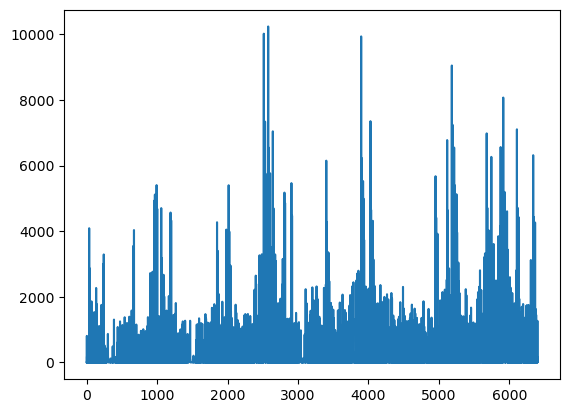

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Scaling the Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.00000000e+00],
       [0.00000000e+00],
       [1.95274360e-04],
       ...,
       [1.23918571e-01],
       [9.76371802e-05],
       [3.90548721e-04]])

### Train-Test Split

In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size, test_size

(4481, 1921)

In [22]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(4380, 100)
(4380,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(1820, 100)
(1820,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
X_train.shape

(4380, 100, 1)

### Building the LSTM Model

In [30]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
69/69 [==============================] - 35s 356ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 2/100
69/69 [==============================] - 22s 324ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 3/100
69/69 [==============================] - 23s 328ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 4/100
69/69 [==============================] - 22s 326ms/step - loss: 0.0045 - val_loss: 0.0073
Epoch 5/100
69/69 [==============================] - 22s 322ms/step - loss: 0.0045 - val_loss: 0.0072
Epoch 6/100
69/69 [==============================] - 22s 320ms/step - loss: 0.0045 - val_loss: 0.0073
Epoch 7/100
69/69 [==============================] - 22s 324ms/step - loss: 0.0045 - val_loss: 0.0072
Epoch 8/100
69/69 [==============================] - 22s 327ms/step - loss: 0.0044 - val_loss: 0.0071
Epoch 9/100
69/69 [==============================] - 22s 323ms/step - loss: 0.0044 - val_loss: 0.0071
Epoch 10/100
69/69 [==============================] - 22s 325ms/step - loss: 0.004

69/69 [==============================] - 22s 323ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 81/100
69/69 [==============================] - 22s 326ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 82/100
69/69 [==============================] - 22s 327ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 83/100
69/69 [==============================] - 22s 325ms/step - loss: 0.0020 - val_loss: 0.0040
Epoch 84/100
69/69 [==============================] - 23s 327ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 85/100
69/69 [==============================] - 22s 325ms/step - loss: 0.0020 - val_loss: 0.0040
Epoch 86/100
69/69 [==============================] - 22s 323ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 87/100
69/69 [==============================] - 22s 324ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 88/100
69/69 [==============================] - 22s 316ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 89/100
69/69 [==============================] - 22s 313ms/step - loss: 0.0018 - 

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

57/57 [==============================] - 4s 68ms/step


In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

676.614562297305

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

913.7005305086931

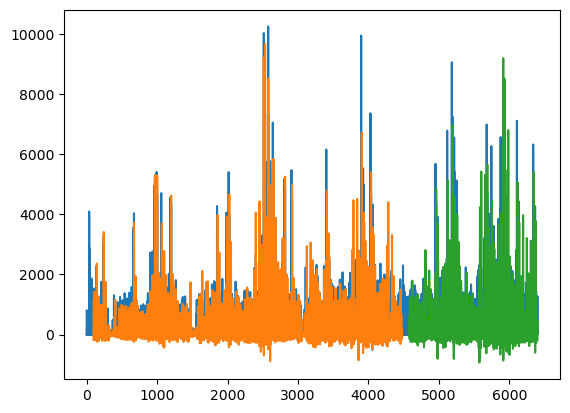

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()